# Modelo de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X = 100 valores distribuidos según una N(1.5,2.5), media y desviacion estandar
* Ye = 5 + 1 * X + e
* e estara distribuida segun una N(0,0.8), si media 0 no, ocurren desplazamientos en el modelo.

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [215]:
x = 1.5 + 2.5 * np.random.randn(100)

In [216]:
res = 0 + 0.8 * np.random.randn(100)

In [217]:
y_pred = 5 + 1 * x

In [218]:
y_act = 5 + 1 * x + res

In [219]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [220]:
data = pd.DataFrame(
{
    "x":x_list,
    "y_actual":y_act_list,
    "y_prediccion":y_pred_list
})

In [221]:
data.head()

,x,y_actual,y_prediccion
0,0.887846,4.363025,5.887846
1,-3.548739,1.606630,1.451261
2,3.642759,10.556830,8.642759
3,0.736103,5.998840,5.736103
4,3.035505,7.464768,8.035505


In [222]:
y_mean =[np.mean(y_act) for i in range(1,len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

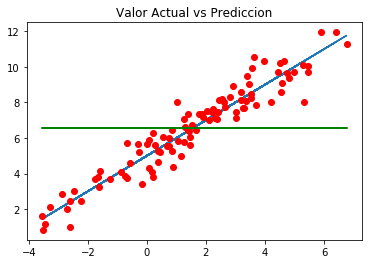

In [223]:
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"],data["y_actual"],"ro")
plt.plot(data["x"],y_mean,"g")
plt.title("Valor Actual vs Prediccion")

In [224]:
data["SSR"] = (data["y_prediccion"]-np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"]-data["y_actual"])**2
data["SST"] = (data["y_actual"]-np.mean(y_act))**2

In [225]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,0.887846,4.363025,5.887846,0.458537,2.325079,4.848691
1,-3.548739,1.606630,1.451261,26.150316,0.024139,24.585427
2,3.642759,10.556830,8.642759,4.317086,3.663669,15.934716
3,0.736103,5.998840,5.736103,0.687068,0.069030,0.320536
4,3.035505,7.464768,8.035505,2.162389,0.325741,0.809584


In [226]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [227]:
SST

638.2462574111269

In [228]:
SSR

588.2783779947918

In [229]:
SSD

55.46960512015309

In [230]:
SSD + SSR

643.7479831149449

In [231]:
R2 = SSR/SST

In [232]:
R2

0.9217106581728872

(array([ 2.,  3., 11., 22., 21., 22., 11.,  6.,  1.,  1.]),
 array([-1.98255015, -1.5544567 , -1.12636325, -0.6982698 , -0.27017635,
         0.15791711,  0.58601056,  1.01410401,  1.44219746,  1.87029091,
         2.29838436]),
 <a list of 10 Patch objects>)

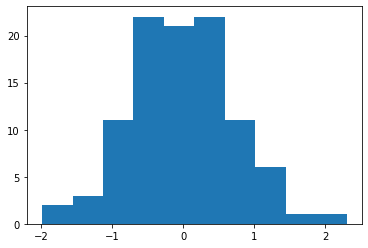

In [233]:
plt.hist((data["y_prediccion"]-data["y_actual"]))#SSD

# Obteniendo la recta de regresión

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [234]:
x_m = np.mean(data["x"])
y_m = np.mean(data["y_actual"])
x_m, y_m

(1.5388045170053788, 6.56499888372369)

In [235]:
data["beta_numerador"] = (data["x"]-x_m)*(data["y_actual"]-y_m)
data["beta_denominador"] = (data["x"]-x_m)**2

In [236]:
beta = sum(data["beta_numerador"])/sum(data["beta_denominador"])

In [237]:
alpha = y_m -beta *x_m

In [238]:
alpha, beta

(5.033211346304714, 0.9954399798617317)

* El modelo lineal obtenido por regresion es: y = 4.950816085564027 +  1.040281988430695 * x

In [239]:
data["y_model"] = alpha + beta * data["x"]

In [240]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_numerador,beta_denominador,y_model
0,0.887846,4.363025,5.887846,0.458537,2.325079,4.848691,1.433395,0.423748,5.917008
1,-3.548739,1.606630,1.451261,26.150316,0.024139,24.585427,25.225920,25.883100,1.500655
2,3.642759,10.556830,8.642759,4.317086,3.663669,15.934716,8.398630,4.426623,8.659359
3,0.736103,5.998840,5.736103,0.687068,0.069030,0.320536,0.454457,0.644329,5.765958
4,3.035505,7.464768,8.035505,2.162389,0.325741,0.809584,1.346685,2.240113,8.054875


In [241]:
SSR = sum((data["y_model"]-y_m)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_m)**2)

In [242]:
SSR,SSD,SST

(582.8574978823214, 55.388759528805856, 638.2462574111267)

In [243]:
len(data)

100

In [244]:
R2 = SSR/SST
R2

0.9132172591916561

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

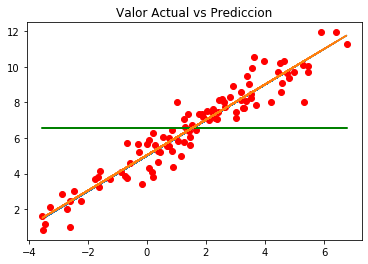

In [245]:
y_mean =[np.mean(y_act) for i in range(1,len(x_list) + 1)]
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean,"g")
plt.plot(data["x"],data["y_model"])
plt.title("Valor Actual vs Prediccion")

## Error estandar de los residuos (RSE)

In [246]:
RSE = np.sqrt(SSD)/(len(data)-2)

In [247]:
RSE

0.07594247445373621

In [248]:
np.mean(data["y_actual"])

6.56499888372369

In [249]:
RSE / np.mean(data["y_actual"])

0.011567781777087125